In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from pprint import pprint
import seaborn as sns
import os
import cv2

from tensorflow import keras
from keras import backend as K
from tensorflow.keras.preprocessing.image import load_img
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Activation, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNet, imagenet_utils
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet import preprocess_input
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
X = []
y = []
classes = ['watch', 'sunglasses', 'empty']
base_path = '/content/drive/MyDrive/images2/'

for i, target in enumerate(classes):
    files = os.listdir(base_path+target)
    for file in files:
         # load the image
        img = load_img(base_path+target+'/'+file)
         # convert it to an array
        img_array = img_to_array(img)
         # append the array to X
        X.append(img_array)
         # append the numeric target to y
        y.append(i)

X = np.array(X)
y = np.array(y)

# shuffle the data
shuffler = np.random.permutation(len(X))
X = X[shuffler]
y = y[shuffler]

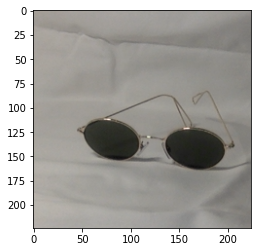

In [4]:
img = load_img("/content/drive/MyDrive/images2/sunglasses/21-55-02-198741.png")
plt.imshow(img)
plt.show()

In [5]:
X.shape, y.shape

((342, 224, 224, 3), (342,))

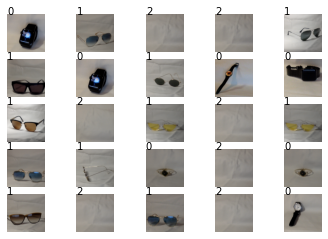

In [6]:
# Have a look at the data graphically:
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X[i].astype('uint8'), cmap='Blues')
    plt.axis('off')
    plt.text(0, 0, y[i]) # displays y-values in each subplot

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size = 0.25, random_state = 42) 

X_train.shape, y_train.shape

((256, 224, 224, 3), (256,))

In [8]:
y

array([0, 1, 2, 2, 1, 1, 0, 1, 0, 0, 1, 2, 1, 2, 1, 1, 1, 0, 2, 0, 1, 2,
       1, 2, 0, 1, 1, 2, 1, 0, 0, 0, 2, 1, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0,
       0, 1, 1, 2, 0, 0, 2, 1, 1, 1, 2, 1, 0, 2, 0, 1, 2, 2, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 2, 2, 1, 2, 0, 1, 0, 0, 2, 0, 2, 2, 1, 2, 0,
       2, 1, 0, 0, 1, 2, 1, 2, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1, 2, 1, 1, 1,
       1, 2, 2, 1, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 2, 1, 0, 2, 1, 1, 1, 2,
       2, 0, 2, 0, 0, 1, 0, 1, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2, 2, 2, 1, 2,
       2, 1, 1, 0, 2, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 2,
       0, 0, 1, 1, 1, 2, 0, 2, 0, 2, 2, 2, 1, 2, 1, 1, 2, 0, 1, 1, 2, 1,
       0, 1, 1, 1, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 1, 1, 2, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 2, 2, 2, 0, 1, 2, 1, 2, 2, 2, 0,
       1, 0, 0, 1, 0, 1, 1, 2, 1, 1, 0, 2, 2, 2, 0, 1, 0, 0, 0, 2, 2, 0,
       1, 2, 1, 1, 2, 1, 2, 0, 2, 1, 1, 0, 2, 0, 1, 1, 0, 2, 1, 0, 0, 0,
       2, 2, 2, 0, 2, 0, 0, 1, 1, 0, 2, 2, 1, 2, 2,

In [9]:
ytest_true = y_test.copy()

In [29]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [30]:
# Clear session and build model:
K.clear_session()

model1 = Sequential([
    Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = "valid", activation = "relu" ,
           input_shape = (224, 224, 3)), 
    
    MaxPooling2D(pool_size = (2,2),strides=(2,2),padding = "valid"),

    Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = "valid", activation = "relu"),
    
    MaxPooling2D(pool_size = (2,2),strides=(2,2),padding = "valid"),
    
    Flatten(),
    
    #Fully connected layers:
    
    Dense(512,activation='relu'),
    Dropout(0.2),# - optional
    
    #Output layer:
    Dense(3 ,activation= "softmax")

    
])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 512)               9

In [31]:
# compile the model
model1.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [32]:
X_train.shape, y_train.shape

((256, 224, 224, 3), (256, 3))

In [33]:
history = model1.fit(X_train, y_train, epochs=10, validation_split = 0.25)

Epoch 1/10
6/6 [==============================] - 24s 4s/step - loss: 10168.9199 - accuracy: 0.3125 - val_loss: 2986.3833 - val_accuracy: 0.3438
Epoch 2/10
6/6 [==============================] - 21s 4s/step - loss: 1212.4652 - accuracy: 0.4323 - val_loss: 35.9881 - val_accuracy: 0.6250
Epoch 3/10
6/6 [==============================] - 21s 4s/step - loss: 62.6669 - accuracy: 0.7292 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
6/6 [==============================] - 19s 3s/step - loss: 3.3497 - accuracy: 0.9375 - val_loss: 1.2163 - val_accuracy: 0.7031
Epoch 5/10
6/6 [==============================] - 21s 4s/step - loss: 0.8438 - accuracy: 0.9271 - val_loss: 0.0435 - val_accuracy: 0.9844
Epoch 6/10
6/6 [==============================] - 19s 3s/step - loss: 0.2618 - accuracy: 0.9948 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 19s 3s/step - loss: 0.0867 - accuracy: 0.9844 - val_loss: 3.3912e-04 - val_accuracy: 1.0000
Epoch 8/10

In [34]:
history.history

{'loss': [10168.919921875,
  1212.4652099609375,
  62.6668701171875,
  3.3496553897857666,
  0.843834400177002,
  0.2618352472782135,
  0.08670858293771744,
  5.742366790771484,
  73.69194793701172,
  3.9614667892456055],
 'accuracy': [0.3125,
  0.4322916567325592,
  0.7291666865348816,
  0.9375,
  0.9270833134651184,
  0.9947916865348816,
  0.984375,
  0.90625,
  0.7864583134651184,
  0.953125],
 'val_loss': [2986.38330078125,
  35.98810958862305,
  0.0,
  1.2163238525390625,
  0.04347803816199303,
  0.0,
  0.00033911861828528345,
  90.91641998291016,
  1.6289573907852173,
  11.001253128051758],
 'val_accuracy': [0.34375,
  0.625,
  1.0,
  0.703125,
  0.984375,
  1.0,
  1.0,
  0.71875,
  0.984375,
  0.859375]}

In [35]:
model1.evaluate(X_test,  y_test, verbose=2)

3/3 - 2s - loss: 13.2067 - accuracy: 0.8953 - 2s/epoch - 700ms/step


[13.206659317016602, 0.895348846912384]

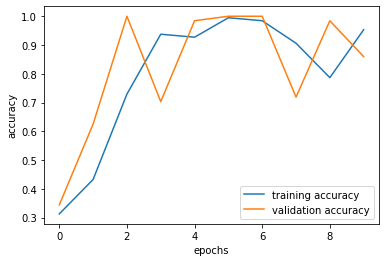

In [36]:
# Plot accuracy curve
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label= 'validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

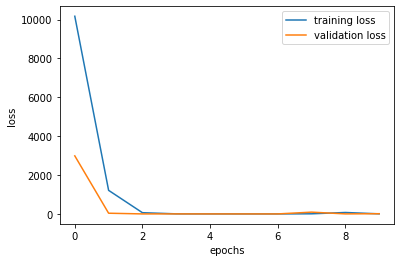

In [37]:
# Plot loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [39]:
ypred = model1.predict(X_test)
ypred[1]

3/3 [==============================] - 4s 1s/step


array([0.99999994, 0.        , 0.        ], dtype=float32)

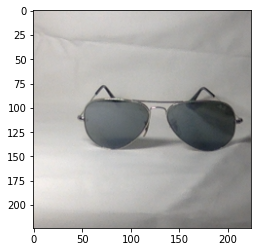

In [41]:
plt.imshow(X_test[7].astype('uint8'),cmap='gray');

In [42]:
ytest_true[7], y_test[7]

(1, array([0., 1., 0.], dtype=float32))

In [56]:
new_ypred=np.where(ypred > 0.5, 1, 0)

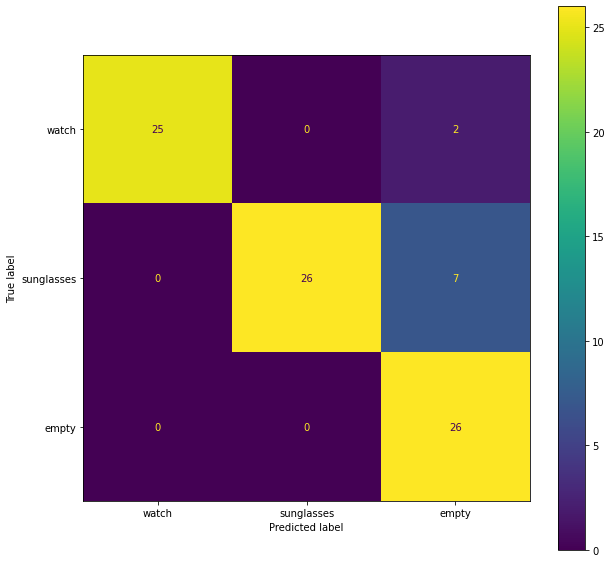

In [57]:
# Plot confusion matrix
cm = confusion_matrix(y_true=ytest_true, y_pred=np.argmax(new_ypred, axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['watch', 'sunglasses', 'empty'])
fig, ax = plt.subplots(figsize=(10,10))

disp.plot(ax=ax);

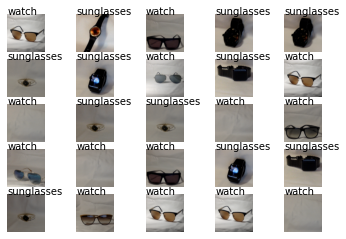

In [59]:


# Have a look at the data graphically:
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_test[i].astype('uint8'))
    plt.axis('off')
    plt.text(0, 0, classes[new_ypred[i][0]]) 